# <b>Introdução</b>
***

## Quem Somos?

Nosso grupo é composto por 3 integrantes:

<table style='align:center'>
  <tr>
    <td align="center"><a href="https://github.com/DaviReisVieira"><img style="border-radius: 50%;" src="https://github.com/DaviReisVieira.png" width="100px;" alt=""/><br /><sub><b>Davi Reis Vieira</b></sub></a><br /><a href="https://github.com/DaviReisVieira" title="Davi Reis Vieira">O Cara -1</a></td>
    <td align="center"><a href="https://github.com/fran-janela"><img style="border-radius: 50%;" src="https://github.com/fran-janela.png" width="100px;" alt=""/><br /><sub><b>Francisco Janela</b></sub></a><br /><a href="https://github.com/fran-janela" title="Francisco Janela">O cara 0</a></td>
    <td align="center"><a href="https://github.com/henriquemf"><img style="border-radius: 50%;" src="https://github.com/henriquemf.png" width="100px;" alt=""/><br /><sub><b>Henrique Frezzatti</b></sub></a><br /><a href="https://github.com/henriquemf" title="Henrique Frezzatti">O cara +1</a></td>
  </tr>
</table>

# <b>Bibliotecas Utilizadas</b>
***

In [111]:
%matplotlib inline
from pprint import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# <b>Carregando os Dados</b>
***

O dataset a ser utilizado é o Spaceship Titanic. Ele possui um conjunto de treino e um conjunto de teste já previamente separados pelo próprio autor da base. Essa base se trata de um dataset fictício, criado com o intuito de simular o problema de Machine Learning original do Titanic. Abaixo se encontra o link para o dataset:

<a href="https://www.kaggle.com/competitions/spaceship-titanic">Link para Download do Dataset e Dados Completos</a> 

Tendo isso em vista, o propósito inicial do projeto se trata de construir um modelo de _Machine Learning_ para prever se o passageiro a bordo da nave espacial foi teletransportado para uma outra dimensão ou não. Ou seja, essa variável é a nossa _feature_ a qual será trabalhada visando obtê-la no final do processo de treinamento do modelo. 

In [112]:
data = pd.read_csv("data.csv")

In [113]:
teste = pd.read_csv("test.csv")

Abaixo, rodamos os comandos a seguir com o intuito de saber com quantos dados estaremos trabalhando durante o projeto.

In [114]:
print('Dataset de Dados | Total de Linhas: {}. Total de Colunas: {}' .format(data.shape[0],data.shape[1]))
print('Dataset de Validação | Total de Linhas: {}. Total de Colunas: {}' .format(validation.shape[0],validation.shape[1]))

Dataset de Dados | Total de Linhas: 8693. Total de Colunas: 14
Dataset de Validação | Total de Linhas: 4277. Total de Colunas: 13


# <b>Analisando Variáveis</b>
***

Com o arquivo guardado na forma de um _dataframe_, agora é possível lê-lo com facilidade para os usos necessários. Abaixo está sendo mostrando os primeiros 10 itens de ambos os arquivos .csv (os dados e o validation).

In [115]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [116]:
validation.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [118]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### Conclusão da análise de variáveis

Após analisar com o .info(), é possível perceber que existem alguns diversos valores faltantes para algumas diversas variáveis, sendo estas tanto categóricas como numéricas, o que será necessário a implementação de um _imputer_ adequado e, para isso, será realizada uma análise de diferentes modelos de _imputer_ para, no fim, decidir qual usar para a melhor acurácia possível para podermos treinar o modelo da maneira correta.

### Variáveis e significados

As variáveis presentes no _dataset_ são as seguintes:

- <span style="color: blue;">PassangerId (numérico)</span> = ID do passageiro, um valor único que identifica o passageiro em questão;
- <span style="color: blue;"> HomePlanet (categórico)</span> = Planeta do qual o passageiro em questão se origina ou onde reside;
- <span style="color: blue;"> CryoSleep (categórico)</span> = Indica se o passageiro está ou não em um sono criogênico, ou seja, se está isolado em uma cabine em um compartimento selado em sono profundo;
- <span style="color: blue;"> Cabin (categórico) </span> = Indica o número e o local da cabine onde o passageiro está acomodado;
- <span style="color: blue;"> Destination (categórico) </span> = Indica o planeta de destino do passageiro;
- <span style="color: blue;"> Age (numérico) </span> = Idade do passageiro;
- <span style="color: blue;"> VIP (categórico) </span> = Indica se o passageiro tem ou não acesso a serviços VIP durante a viagem;
- <span style="color: blue;"> RoomService, FoodCourt, ShoppingMall, Spa, VRDeck (todos numéricos) </span> = Indicam o tanto que foi gasto pelo passageiro em cada um desses serviços;
- <span style="color: blue;"> Name (categórico) </span> = Nome e sobrenome do passageiro;

# <b>Analisando as Variáveis Categóricas</b>
***

Abaixo, será realizada uma análise de cada uma das variáveis categóricas, visando saber quantos valores de cada opção existente estão presentes em cada uma delas, além de remover variáveis que não influenciam no resultado direto da *_target_*, como Nome e ID. Além disso, também será analisado a correlação de cada uma das variáveis categóricas com a nossa variável _*target*_.

##### <b>Home Planet</b>

In [119]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

##### <b>Cryo Sleep</b>

In [120]:
data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

##### <b>Destination</b>

In [121]:
data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

##### <b>VIP</b>

In [122]:
data["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

Removendo variáveis indiferentes para o resultado final

In [123]:
data.drop(["PassengerId", "Name"], axis=1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


Separando a base de dados em uma base com apenas os dados categóricos relevantes.

In [124]:
data_cat = data.loc[:, ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]]
data_cat

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False
...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,True
8689,Earth,True,G/1499/S,PSO J318.5-22,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,False
8691,Europa,False,E/608/S,55 Cancri e,False


##### <b>Transported</b>

In [125]:
target = data.loc[:, ["Transported"]]
target.value_counts()

Transported
True           4378
False          4315
dtype: int64

#### <b>Histograma</b>

Abaixo, será plotado um gráfico para possibilitar a visualização da correlação entre cada uma das variáveis categóricas e o _*target*_, mostrando em que casos é mais provável que seja *True* ou *False*.

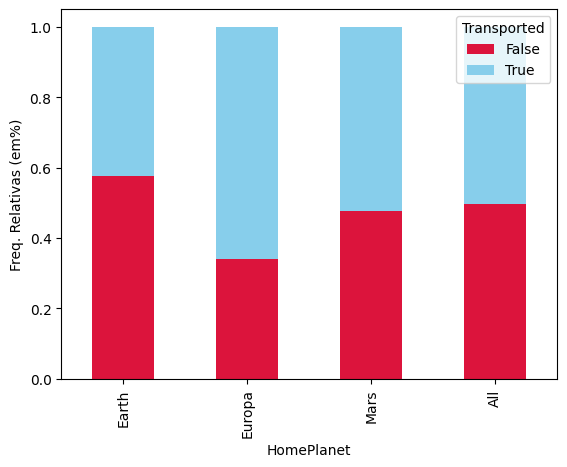

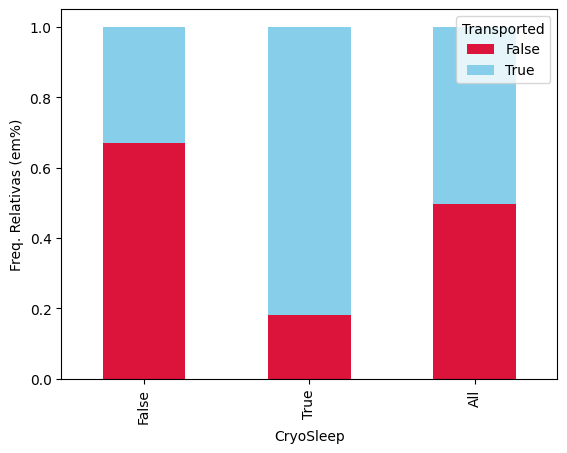

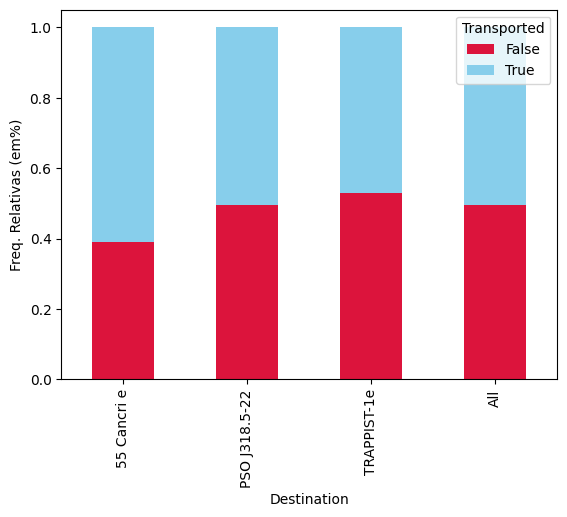

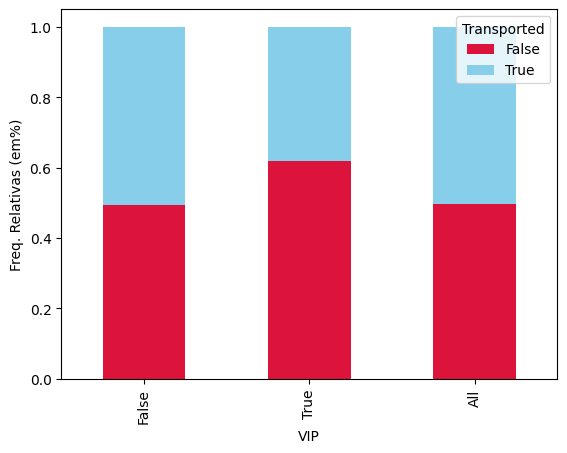

In [126]:
lista=["HomePlanet",'CryoSleep','Destination','VIP']
cores = ['crimson','skyblue']
n=0

for i in lista:
    Transported_x_y=pd.crosstab(data[i], data['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

## <b> Análise dos gráficos </b>

***

#### <b>HomePlanet</b>

A partir do gráfico gerado, é possível notar que a probabilidade de um passageiro ser teletransportado para outra dimensão acaba sendo maior para os casos em que seu planeta de origem é Europa, podendo resultar em uma possível correlação entre esses fatores.

#### <b>CryoSleep</b>

Com esse gráfico, a probabilidade de um passageiro que esteja em Cryo Sleep seja teletransportado é de mais de 80%, o que pode indicar uma forte correlação entre a <b>_target_</b> essa variável. 

#### <b>Destination</b>

Com os resultados obtidos, o planeta de destino que mais gerou casos de passageiros sendo teletransportados foi o 55 Cancri e, porém, sua correlação não é muito grande, sendo que apenas 60% dos casos foram verdadeiros, mas ainda não é possível descartar essa variável.

#### <b>VIP</b>

Nesse caso, quando o passageiro possuia acesso aos serviços VIP, isso resultou em uma menor probabilidade de ter sido teletransportado, o que pode ser um indício de uma boa correlação entre essas duas variáveis.

****

Abaixo, será realizado um split visando separar as diferentes classificações possíveis para identificar a localização da cabine do passageiro, sendo elas: deck, num e side.

- Deck = Altura;
- Num = Número da cabine;
- Side = P (Port) ou S (Starboard)

In [127]:
data[['deck','num','side']] = data['Cabin'].str.split('/', expand = True)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


Com essas variáveis divididas, é possível analisar as diferentes correlações entre cada uma das variáveis de Cabin com a variável <b>_target_</b>, podendo interpretar se a posição do passageiro na espaçonave é um diferencial ou não.

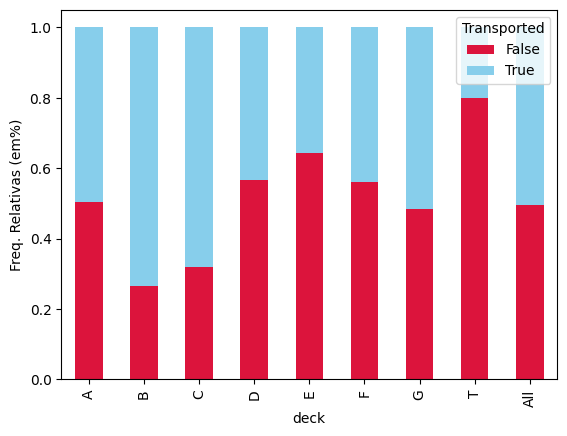

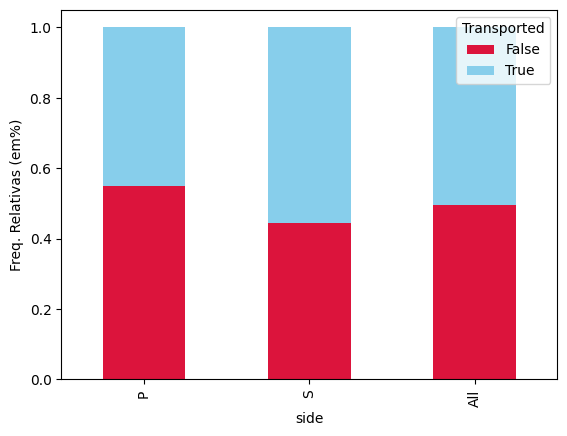

In [128]:
lista=["deck",'side',]
cores = ['crimson','skyblue']
n=0

for i in lista:
    Transported_x_y=pd.crosstab(data[i], data['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

## <b>Análise dos gráficos </b>
***

#### <b> Deck </b>

Com o gráfico obtido nessa variável, é possível interpretar que os andares com maior probabilidade de fazer com que o passageiro seja teletransportado são os andares B e C, podendo indicar que essa posição em específico faça com que a chance de isso ocorrer aumente.

#### <b> Side </b>

A partir do gráfico obtido, pode-se dizer que a diferença de probabilidade de se obter _True_ na variável do <b>_target_</b> entre o side P ou S é muito pequena, apesar de que caso o passageiro se encontre na Starboard, a sua probabilidade é maior, podendo indicar uma não relevância dessa variável para a mudança do <b>_target_</b>.

***

/var/folders/8d/d5by2ryj0lb7mrtngnh40lzr0000gn/T/ipykernel_38614/823273497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['num'] = data_test['num'].astype(int)


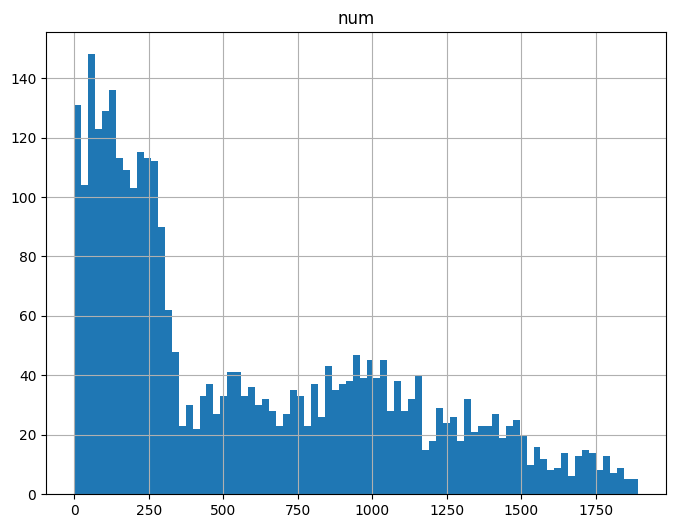

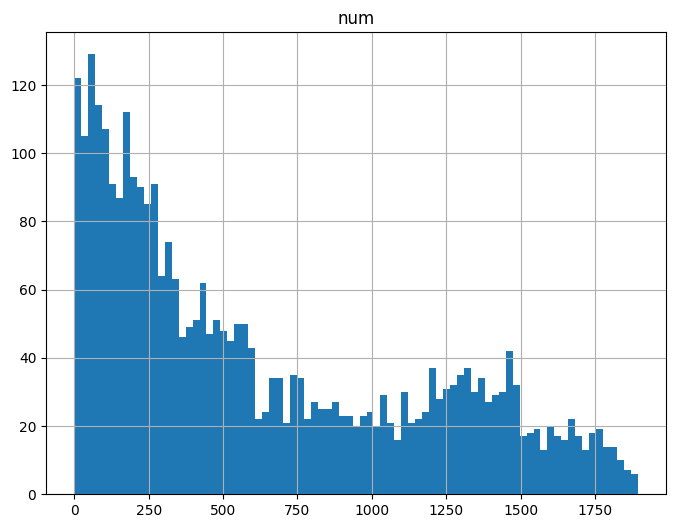

In [129]:
# create data test for all non nan num values
data_test = data.dropna()
# transform column num to integer
data_test['num'] = data_test['num'].astype(int)
# plot histogram for transported True
data_test.loc[data_test["Transported"] == True].loc[:, ["num"]].hist(bins=int(np.sqrt(len(data_test))), figsize=(8,6));
data_test.loc[data_test["Transported"] == False].loc[:, ["num"]].hist(bins=int(np.sqrt(len(data_test))), figsize=(8,6));

# <b > Analisando as variáveis numéricas</b>
***

Agora, será separado as variáveis numéricas do resto da base de dados, para que também seja possível a análise de cada uma delas e suas correlações com a <b>_target_</b>.

In [130]:
data_num = data.loc[:, ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
data_num

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [131]:
BINS = int(np.sqrt(len(data_num.index)))

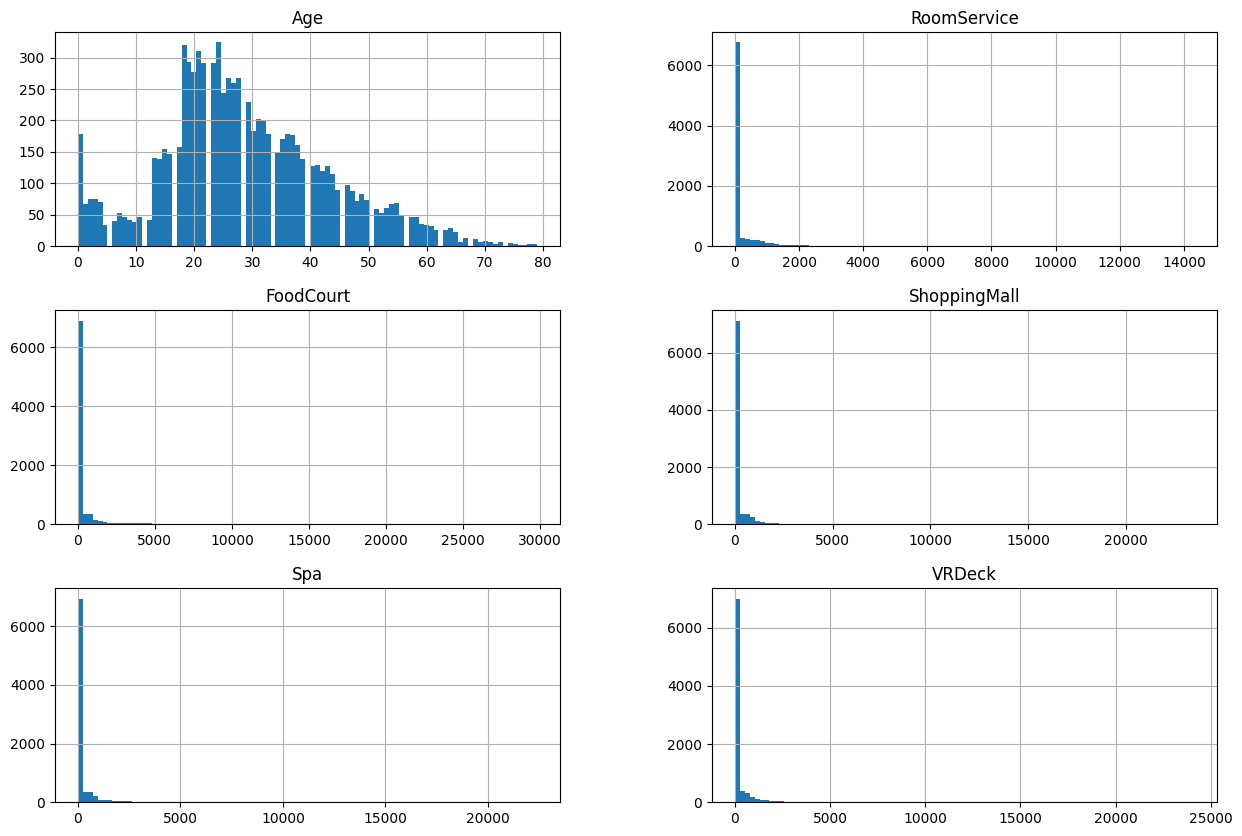

In [132]:
data_num.hist(bins=BINS, figsize=(15,10));

## <b>Analisando gráficos</b>
***

#### <b>RoomService, Spa, VRDeck, FoodCourt, ShoppingMail</b>

A partir dos gráficos acima, podemos perceber que as variáveis numéricas, com exceção de Age, possuem muitos valores nulos, isso ocorre quando o passageiro não possui nenhum gasto nesses serviços. Com isso, vamos analisar para encontrarmos em que casos isso mais ocorre.
***

Abaixo, foi realizada uma tentativa de normalização do gráfico de RoomService para melhor interpretação dos dados, mas sem sucesso.

<AxesSubplot: ylabel='Frequency'>

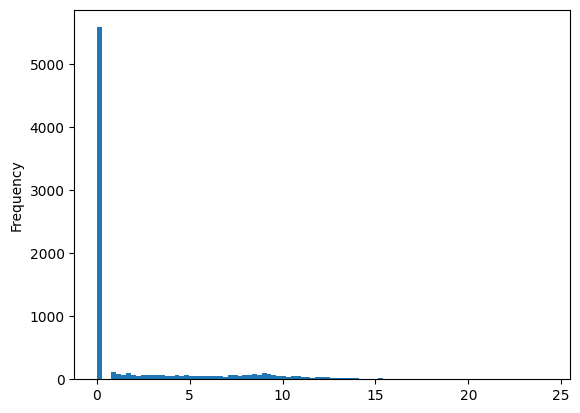

In [133]:
data_num["RoomService"].apply(np.cbrt).plot.hist(bins = BINS)

In [134]:
data.loc[data["CryoSleep"] == True].loc[:, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].value_counts()

RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0.0          0.0        0.0           0.0  0.0       2690
dtype: int64

Acima, é possível perceber que quando o passageiro está em estado de CryoSleep, ele não vai possuir nenhum gasto com as ofertas da nave. Isso pode ser levado em consideração para preencher alguns valores nulos de gasto.

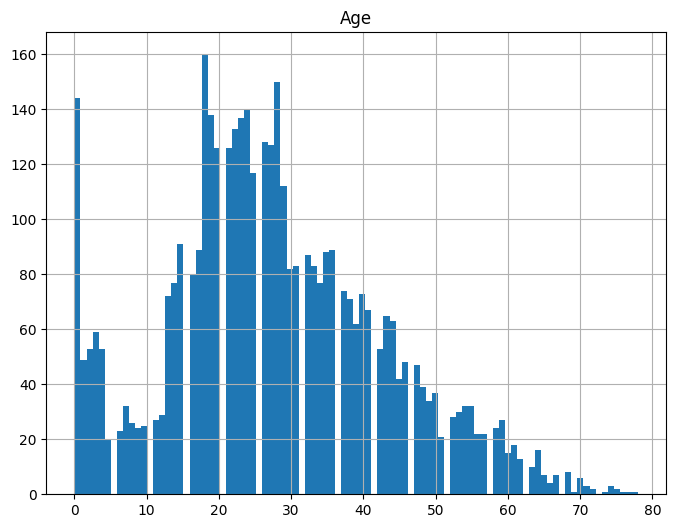

In [135]:
data.loc[data["Transported"] == True].loc[:, ["Age"]].hist(bins=BINS, figsize=(8,6));

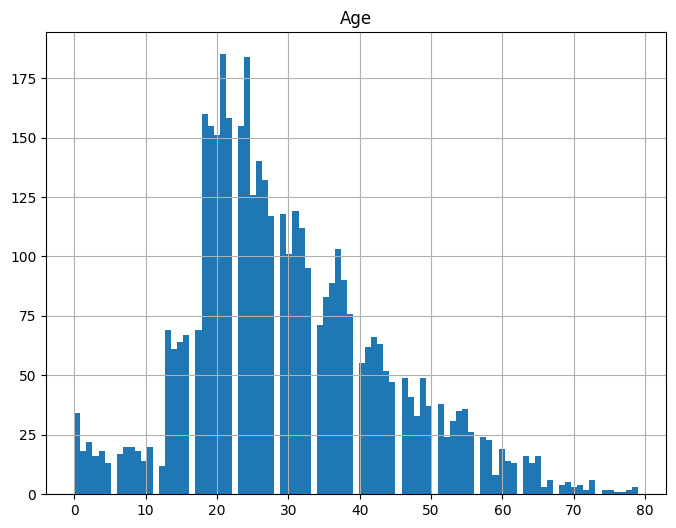

In [136]:
data.loc[data["Transported"] == False].loc[:, ["Age"]].hist(bins=BINS, figsize=(8,6));

A partir dos gráficos acima, é possível interpretar que, ainda que aparente não possuir muita relação, podemos notar uma leve diferença com relação aos passageiros mais novos, que tiveram uma chance maior de serem teletransportados.

# Limpeza e Preenchimento
***

Para começar, baseado na análise das variáveis de CryoSleep e despezas na nave, serão preenchidos todos os gastos com zero daquelas pessoas que estavam viajando em CryoSleep.

In [137]:
data.loc[data["CryoSleep"] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0 

Depois de preenchidos estes valores, outros resultados serão preenchidos utilizando a melhor função de **Inputer**, que será medida pela acurácia do CrossValidation com a padronização de um modelo de classificação.

# Análise de Imputers
***

Agora, será realizado uma regressão para determinar qual o melhor tipo de *Imputer* para podermos aplicar na base de dados original para os dados faltantes. Os tipos de inputer testados serão o SimpleImputer, IterativeImputer e KNNImputer.

In [138]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

data_for_input = data.drop(["PassengerId", "Name", "Cabin", "deck", "side", "HomePlanet",'Destination'], axis=1)

#Separação atributos(X) e target(y):
y_for_imputer = data_for_input.loc[:,"Transported"]
X_for_imputer = data_for_input.drop(["Transported"], axis=1)

In [139]:
from sklearn.ensemble import RandomForestRegressor

# Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Definindo o número de cortes para o CrossValidation
N_SPLITS = 4
# Criando o nosso regressor com a seed randômica configurada acima:
regressor = RandomForestRegressor(random_state=RAND_SEED)

A função abaixo será criada com o intuito de calcular os scores de cada um dos modelos de *Imputer*

In [140]:
def get_scores_for_imputer(imputer, X, y):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X, y, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores

In [141]:
# Simple Imputer:
def get_impute_simple_score(X, y):
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    mean_impute_scores = get_scores_for_imputer(imputer, X, y)
    return mean_impute_scores.mean(), mean_impute_scores.std(), mean_impute_scores

# Interactive Imputer:
def get_impute_iterative_score(X, y):
    imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        max_iter=1,
        sample_posterior=True,
    )
    iterative_impute_scores = get_scores_for_imputer(imputer, X, y)
    return iterative_impute_scores.mean(), iterative_impute_scores.std(), iterative_impute_scores

# KNN Imputer:
def get_impute_knn_score(X, y):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X, y)
    return knn_impute_scores.mean(), knn_impute_scores.std(), knn_impute_scores

In [142]:
# Criando as listas
x_labels = []

score_mean_list = np.zeros(3)
score_std_list = np.zeros(3)

## Aplicando os Testes:
# Simple Imputer
score_mean_list[0], score_std_list[0], simple_score = get_impute_simple_score(X_for_imputer, y_for_imputer)
x_labels.append("Simple Imputer")

# Interactive Imputer:
score_mean_list[1], score_std_list[1], interactive_score = get_impute_iterative_score(X_for_imputer, y_for_imputer)
x_labels.append("Interactive Imputer")

# KNN Imputer:
score_mean_list[2], score_std_list[2], knn_score = get_impute_knn_score(X_for_imputer, y_for_imputer)
x_labels.append("KNN Imputer")

## <b>Gráfico</b>

Abaixo, será plotado o gráfico com os scores de cada um dos modelos de *Imputer*, sendo possível ao fim, selecionar o melhor modelo para aplicar na base de dados.

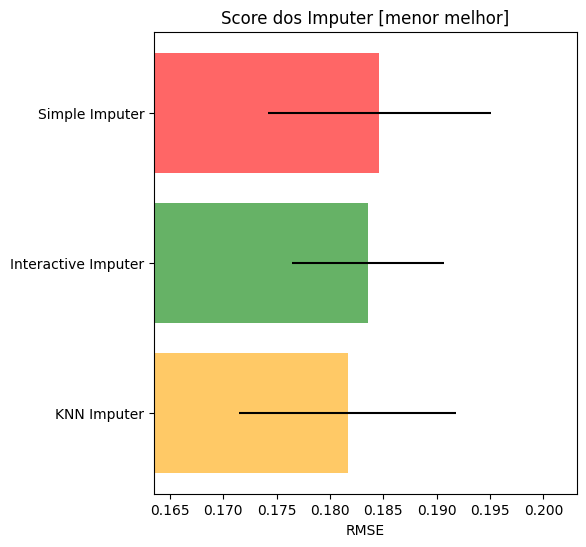

In [143]:
n_bars = len(score_mean_list)
xval = np.arange(n_bars)

colors = ["r", "g", "orange"]

# Invertendo o valor das médias para torná-las positivas:
score_mean_list = score_mean_list*-1

# Plotando os Resultados
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        score_mean_list[j],
        xerr=score_std_list[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Score dos Imputer [menor melhor]")
ax1.set_xlim(left=np.min(score_mean_list) * 0.9, right=np.max(score_mean_list) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("RMSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)


plt.show()

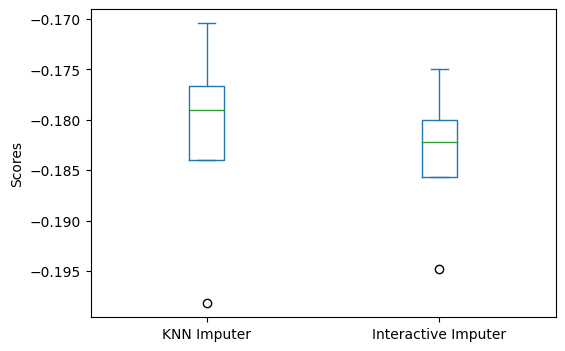

In [144]:
score_mean_list
pd.DataFrame({
    'KNN Imputer': knn_score,
    'Interactive Imputer': interactive_score,
}).plot.box(
    xlabel='',
    ylabel=r'Scores',
    figsize=(6, 4),
);

## Resultado

Como é possível observar nos gráficos acima, o modelo de imputer com menor erro e melhor performance é o KNN Imputer. Logo, esse será o método utilizado abaixo para a aplicação final na base de dados original do projeto.

In [145]:
imputer = KNNImputer(missing_values=np.nan)
X_tratado = imputer.fit_transform(X_for_imputer)

X_tratado

array([[0.000e+00, 3.900e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.400e+01, 0.000e+00, ..., 5.490e+02, 4.400e+01,
        0.000e+00],
       [0.000e+00, 5.800e+01, 1.000e+00, ..., 6.715e+03, 4.900e+01,
        0.000e+00],
       ...,
       [0.000e+00, 2.600e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.500e+03],
       [0.000e+00, 3.200e+01, 0.000e+00, ..., 3.530e+02, 3.235e+03,
        6.080e+02],
       [0.000e+00, 4.400e+01, 0.000e+00, ..., 0.000e+00, 1.200e+01,
        6.080e+02]])

In [146]:
X_tratado = pd.DataFrame(X_tratado, columns=X_for_imputer.columns)
X_tratado.loc[(X_tratado["VIP"] == 0.2) | (X_tratado["VIP"] == 0.4), ["VIP"]] = 0
X_tratado.loc[(X_tratado["CryoSleep"] == 0.2) | (X_tratado["CryoSleep"] == 0.4) | (X_tratado["CryoSleep"] == 0.6) | (X_tratado["CryoSleep"] == 0.8), ["CryoSleep"]] = 0
X_tratado

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8688,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,98.0
8689,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1499.0
8690,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1500.0
8691,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,608.0


In [147]:
data_y_train = data["Transported"]
temp = data.drop(["PassengerId", "Transported"], axis=1)
data_important = temp.loc[:, ["Name", "Cabin", "deck", "side", "HomePlanet",'Destination']]
data_tratado = pd.concat([X_tratado, data_important], axis=1)
data_tratado

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,Name,Cabin,deck,side,HomePlanet,Destination
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B/0/P,B,P,Europa,TRAPPIST-1e
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0.0,Juanna Vines,F/0/S,F,S,Earth,TRAPPIST-1e
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,Altark Susent,A/0/S,A,S,Europa,TRAPPIST-1e
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,Solam Susent,A/0/S,A,S,Europa,TRAPPIST-1e
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy Santantines,F/1/S,F,S,Earth,TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,98.0,Gravior Noxnuther,A/98/P,A,P,Europa,55 Cancri e
8689,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1499.0,Kurta Mondalley,G/1499/S,G,S,Earth,PSO J318.5-22
8690,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1500.0,Fayey Connon,G/1500/S,G,S,Earth,TRAPPIST-1e
8691,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,608.0,Celeon Hontichre,E/608/S,E,S,Europa,55 Cancri e


In [148]:
from sklearn.preprocessing import OneHotEncoder

data_cat = data_tratado.loc[:, ["HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side"]]
data_cat = data_cat.fillna("NaN")

meu_one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
meu_one_hot_encoder.fit_transform(data_cat)


# concat data_cat with data
data_encoded = pd.concat([data_tratado, pd.DataFrame(meu_one_hot_encoder.fit_transform(data_cat), columns=meu_one_hot_encoder.get_feature_names_out())], axis=1)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   float64
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   num                        8693 non-null   float64
 9   Name                       8493 non-null   object 
 10  Cabin                      8494 non-null   object 
 11  deck                       8494 non-null   object 
 12  side                       8494 non-null   object 
 13  HomePlanet                 8492 non-null   objec

# <b> Aplicando Classificadores </b>
***

Agora que os dados estão completos, baseado no método de `Cross Validation` serão escolhidos entre alguns classificadores aquele em que a acurácia é a maior ao classificar o Treino. Os Classificadores explorados serão:

- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
- [KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Naive Bayes - variação multinomial](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [XG Boost](https://xgboost.readthedocs.io/en/stable/python/python_api.html)
- [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [Light Gradient Boosting Machine Classifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

Foram escolhidos baseados naqueles estudados nas aulas de _Machine Learning_ e em outros classificadores famosos disponíveis na biblioteca, que são escolhidos como alguns dos melhores.

Primeiramente, serão criadas as funções que retornaram os resultados do `Cross Validation` de todos os Classificadores, mas agora com o scoring baseado na **acurácia**.

## Classificador Decision Tree

O classificador Decision Tree é um classificador que utiliza uma árvore de decisão para classificar os dados. A árvore de decisão é uma estrutura de dados que é composta por nós e folhas, onde cada nó representa uma decisão e cada folha representa uma classe. Cada nó possui um valor de decisão, que é o valor que será comparado com o valor da variável que está sendo analisada. Quando o nó chega em uma folha, ele é classificado como a classe daquela folha.

Fonte: [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)

In [149]:
# Classificador Decision Tree:

from sklearn.tree import DecisionTreeClassifier

def get_classifier_DTree_score(X, y):
    classifier = DecisionTreeClassifier(random_state=RAND_SEED)
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1)

## Classificador Random Forest

O classificador Random Forest é um classificador que utiliza uma combinação de árvores de decisão para classificar os dados. Ao invés de utilizar apenas uma árvore de decisão, ele utiliza várias árvores e cada uma delas é treinada com uma parte dos dados. Ao final, o classificador Random Forest utiliza a combinação das árvores de decisão para classificar os dados.

O parâmetro `n_estimators` é o número de árvores que serão utilizadas no classificador.

Fonte: [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [150]:
# Classificador Random Forest:

from sklearn.ensemble import RandomForestClassifier

def get_classifier_RForest_score(X, y):
    classifier = RandomForestClassifier(n_estimators=100, random_state=RAND_SEED)
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1)

## Regressão Logística

Regressão logística é um método estatístico para prever classes binárias. O resultado ou variável alvo é dicotômico. Por exemplo, pode ser usado para problemas de detecção de câncer. Ele calcula a probabilidade de ocorrência de um evento acontecer ou não.

Equação da Regressão Linear:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^{n}$$

Onde $y$ é a variável dependente, $x$ é a variável independente e $\beta$ é o coeficiente.


Função de ativação: $$\sigma(x) = \frac{1}{1+e^{-x}}$$

Aplicando a função de ativação na equação da regressão linear:

$$\sigma(y) = \frac{1}{1+e^-({\beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^{n}})}$$

Ao aplicar a função de ativação, o resultado será um valor entre 0 e 1, que representa a probabilidade de ocorrência do evento. Se o resultado for maior que 0.5, o evento ocorrerá, caso contrário, não ocorrerá, probabilisticamente.

Fonte: [Understanding Logistic Regression in Python Tutorial](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)


In [151]:
from sklearn.linear_model import LogisticRegression
# Classificador Regressão Logística:
#     - por ser uma base reduzida usamos o solver: liblinear
#     - por compatibilidade usaremis penalidade l1, mas poderia receber l2


def get_classifier_Logistic_score(X, y):
    classifier = LogisticRegression(
        penalty='l1',
        C=1000,
        solver='liblinear',
        multi_class='auto',
        max_iter=1000,
        random_state=RAND_SEED
    )
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1)

## Classificador SGD

O classificador SGD é um classificador que utiliza o método de descida de gradiente estocástico para classificar os dados. O método de descida de gradiente estocástico é um método que utiliza o gradiente para encontrar o mínimo de uma função. O método de descida de gradiente estocástico utiliza uma amostra única dos dados para calcular o gradiente. 

Equação do gradiente:

$$\nabla f(x) = \frac{\partial f(x)}{\partial x}$$

Equação da descida de gradiente estocástico:

$$x_{t+1} = x_t - \eta \nabla f(x_t)$$

Onde $x_t$ é o valor de $x$ na iteração $t$, $\eta$ é a taxa de aprendizado e $\nabla f(x_t)$ é o gradiente da função $f$ no valor $x_t$.

A descida do gradiente é um dos algoritmos mais populares para realizar otimização e, de longe, a maneira mais comum de otimizar redes neurais.

Parâmetros:

- `max_iter`: número máximo de iterações.
- `tol`: tolerância para o critério de parada.

Fonte [Introduction to SGD Classifier](https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/)

In [152]:
# Classificador SGD:

from sklearn.linear_model import SGDClassifier

def get_classifier_SGD_score(X, y):
    classifier = SGDClassifier(
        max_iter=500,
        tol=1e-3,
        random_state=RAND_SEED,
        n_jobs=-1,
    )
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1)

In [153]:
# Classificador KNN:

from sklearn.neighbors import KNeighborsClassifier

def get_classifier_KNN_score(X, y):
    classifier = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1)

In [154]:
# Classificador MNB:

from sklearn.naive_bayes import MultinomialNB

def get_classifier_MNB_score(X, y):
    classifier = MultinomialNB()
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1)

In [155]:
# Classificador XGBoost:

import xgboost as xgb

def get_classifier_xgboost_score(X, y):
    classifier = xgb.XGBClassifier(random_state=RAND_SEED)
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1) 

In [156]:
# Classificador GradientBoostingClassifier:

from sklearn.ensemble import GradientBoostingClassifier

def get_classifier_gbc_score(X, y):
    classifier = GradientBoostingClassifier(random_state=RAND_SEED)
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1) 

In [157]:
# Classificador LightGBM

from lightgbm import LGBMClassifier

def get_classifier_lgbm_score(X, y):
    classifier =  LGBMClassifier(min_child_weight=0.8, 
                                 random_state=RAND_SEED, 
                                 n_estimators=600, 
                                 learning_rate = 0.01, 
                                 subsample=0.7, 
                                 subsample_freq=1, 
                                 colsample_bytree = 0.85)
    return cross_val_score(classifier, X, y, cv=N_SPLITS, scoring="accuracy", n_jobs=-1) 

In [158]:
!pip install lightgbm

Com todas as funções para cálculo da acurácia utilizando o `Cross Validation`, vamos, assim, calculá-las de fato:

In [159]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   float64
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   num                        8693 non-null   float64
 9   Name                       8493 non-null   object 
 10  Cabin                      8494 non-null   object 
 11  deck                       8494 non-null   object 
 12  side                       8494 non-null   object 
 13  HomePlanet                 8492 non-null   objec

In [160]:
# Criando as listas
x_labels = []

data_encoded_clean = data_encoded.drop(["Name", "Age", "HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side", "Cabin"], axis=1)

score_accuracy_mean_list = np.zeros(9)
score_accuracy_std_list = np.zeros(9)

In [161]:
## Aplicando os Modelos:
# Classificador Decision Tree:
DTree_score = get_classifier_DTree_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[0] = DTree_score.mean()
score_accuracy_std_list[0] = DTree_score.std()
x_labels.append("Decision Tree")

In [162]:
# Classificador Random Forest:
RForest_score = get_classifier_RForest_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[1] = RForest_score.mean()
score_accuracy_std_list[1] = RForest_score.std()
x_labels.append("Random Forest")

In [163]:
# Classificador Regressão Logística:
Logistic_score = get_classifier_Logistic_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[2] = Logistic_score.mean()
score_accuracy_std_list[2] = Logistic_score.std()
x_labels.append("Regressão Logística")

In [164]:
# Classificador SGD:
SGD_score = get_classifier_SGD_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[3] = SGD_score.mean()
score_accuracy_std_list[3] = SGD_score.std()
x_labels.append("SGD")

In [165]:
# Classificador KNN:
KNN_score = get_classifier_KNN_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[4] = KNN_score.mean()
score_accuracy_std_list[4] = KNN_score.std()
x_labels.append("KNN")

In [166]:
# Classificador MNB:
MNB_score = get_classifier_MNB_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[5] = MNB_score.mean()
score_accuracy_std_list[5] = MNB_score.std()
x_labels.append("MNB")

In [167]:
# Classificador XGB:
XGB_score = get_classifier_xgboost_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[6] = XGB_score.mean()
score_accuracy_std_list[6] = XGB_score.std()
x_labels.append("XGB")

In [168]:
# Classificador GBC:
GBC_score = get_classifier_gbc_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[7] = GBC_score.mean()
score_accuracy_std_list[7] = GBC_score.std()
x_labels.append("GBC")

In [169]:
# Classificador LGBM:
LGBM_score = get_classifier_lgbm_score(data_encoded_clean, data_y_train)
score_accuracy_mean_list[8] = LGBM_score.mean()
score_accuracy_std_list[8] = LGBM_score.std()
x_labels.append("LGBM")

Agora, com todos os scores calculados, vou plotar os resultados em um gráfico para análise:

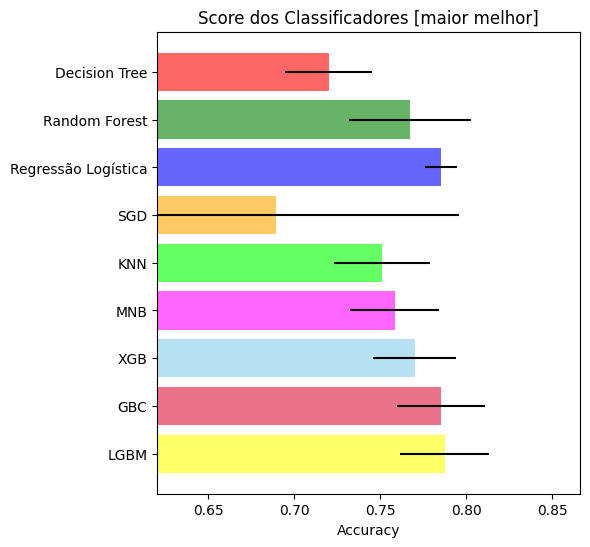

In [170]:
n_bars = len(score_accuracy_mean_list)
xval = np.arange(n_bars)

colors = ["r", "g", "b", "orange", "lime", "magenta", "skyblue", "crimson", "yellow"]

# Plotando os Resultados
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        score_accuracy_mean_list[j],
        xerr=score_accuracy_std_list[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Score dos Classificadores [maior melhor]")
ax1.set_xlim(left=np.min(score_accuracy_mean_list) * 0.9, right=np.max(score_accuracy_mean_list) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("Accuracy")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)


plt.show()

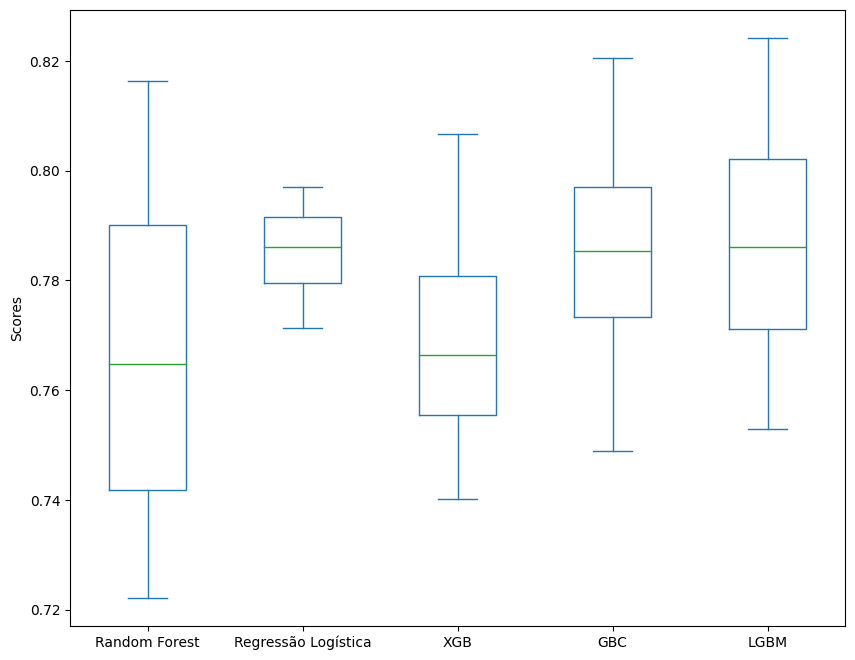

In [171]:
pd.DataFrame({
    'Random Forest': RForest_score,
    'Regressão Logística': Logistic_score,
    'XGB': XGB_score,
    'GBC': GBC_score,
    'LGBM': LGBM_score,
}).plot.box(
    xlabel='',
    ylabel=r'Scores',
    figsize=(10, 8),
);

# Ajuster de Hiperparâmetros

In [172]:
from sklearn.model_selection import GridSearchCV

#### LGBM

In [173]:
LGBM = LGBMClassifier(min_child_weight=0.8, 
                                 random_state=RAND_SEED, 
                                 n_estimators=600, 
                                 learning_rate = 0.01, 
                                 subsample=0.7, 
                                 subsample_freq=1, 
                                 colsample_bytree = 0.85)

params = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid_lgbm = GridSearchCV(LGBM, params, cv=N_SPLITS, n_jobs=-1)

grid_lgbm.fit(data_encoded_clean, data_y_train)

GridSearchCV(cv=4,
             estimator=LGBMClassifier(colsample_bytree=0.85, learning_rate=0.01,
                                      min_child_weight=0.8, n_estimators=600,
                                      random_state=42, subsample=0.7,
                                      subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]})

In [174]:
for key in grid_lgbm.best_params_.keys():
    print(f"{key}: {grid_lgbm.best_params_[key]}")

boosting_type: gbdt
colsample_bytree: 0.64
learning_rate: 0.01
max_bin: 255
n_estimators: 24
num_leaves: 16
objective: binary
random_state: 500
reg_alpha: 1
reg_lambda: 1
subsample: 0.7


Como alguns dos parâmetros apresentados acima estão nos limites colocados para teste, vamos construir uma segunda sequência para garantir que estes são realmente os melhores valores, mantendo aqueles que já estão bem selecionados

In [175]:
params_v2 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [24,32,40],
    'num_leaves': [16,20,24,28], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.62,0.63,0.64],
    'subsample' : [0.65,0.7],
    'reg_alpha' : [0.8,1],
    'reg_lambda' : [0.6,0.8,1],
    }

grid_lgbm_v2 = GridSearchCV(LGBM, params, cv=N_SPLITS, n_jobs=-1)

grid_lgbm_v2.fit(data_encoded_clean, data_y_train)

GridSearchCV(cv=4,
             estimator=LGBMClassifier(colsample_bytree=0.85, learning_rate=0.01,
                                      min_child_weight=0.8, n_estimators=600,
                                      random_state=42, subsample=0.7,
                                      subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]})

In [176]:
for key in grid_lgbm_v2.best_params_.keys():
    print(f"{key}: {grid_lgbm_v2.best_params_[key]}")

boosting_type: gbdt
colsample_bytree: 0.64
learning_rate: 0.01
max_bin: 255
n_estimators: 24
num_leaves: 16
objective: binary
random_state: 500
reg_alpha: 1
reg_lambda: 1
subsample: 0.7


#### Logistic Regression

In [177]:
LogisticRegression_score = LogisticRegression(
        penalty='l1',
        C=1000,
        solver='liblinear',
        multi_class='auto',
        max_iter=1000,
        random_state=RAND_SEED
    )

params = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_lr = GridSearchCV(LogisticRegression_score, params, cv=N_SPLITS, n_jobs=-1)

grid_lr.fit(data_encoded_clean, data_y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(C=1000, max_iter=1000, penalty='l1',
                                          random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}])

In [178]:
for key in grid_lr.best_params_.keys():
    print(f"{key}: {grid_lr.best_params_[key]}")

C: 0.01


# Curva ROC

In [179]:
from sklearn.model_selection import cross_val_predict

#### LGBM

In [180]:
y_scores_lgbm = cross_val_predict(
    grid_lgbm_v2,
    data_encoded_clean,
    data_y_train,
    cv=3,
    method="predict_proba",
    n_jobs=-1,
)

#### Logistic Regression

In [181]:
y_scores_lr = cross_val_predict(
    grid_lr,
    data_encoded_clean,
    data_y_train,
    cv=3,
    method="decision_function",
    n_jobs=-1,
)

In [182]:
from sklearn.metrics import roc_curve

In [183]:
data_y_train_values =  data_y_train.astype(int)

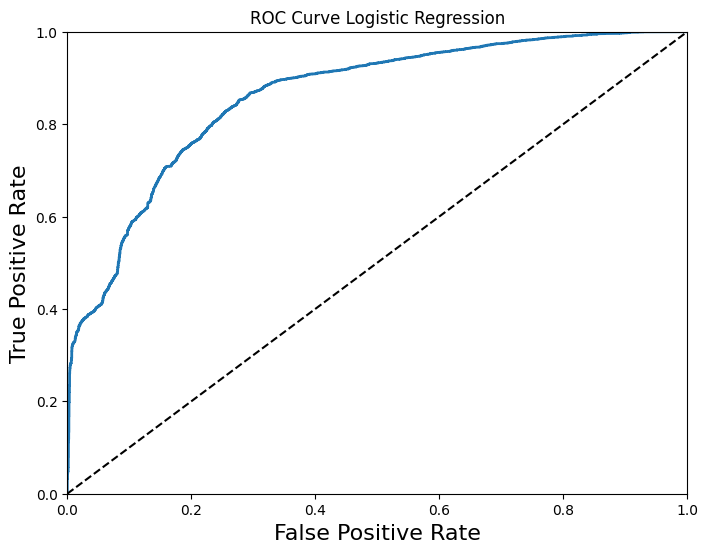

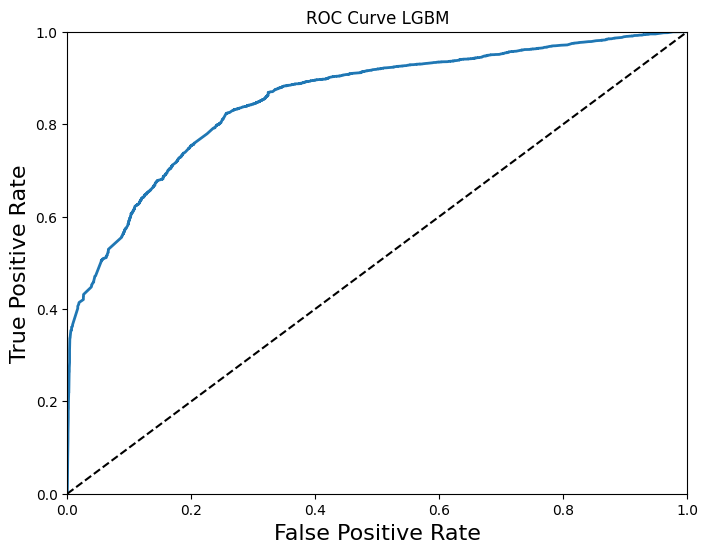

In [184]:
false_positive_rate_lgbm, true_positive_rate_lgbm, threshold_lgbm = roc_curve(data_y_train_values, y_scores_lgbm[:,1])
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(data_y_train_values, y_scores_lr)

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_lr, true_positive_rate_lr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title("ROC Curve Logistic Regression")
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_lgbm, true_positive_rate_lgbm, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title("ROC Curve LGBM")
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

# Heat Map

In [185]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [186]:
y_lgbm_predict = cross_val_predict(
    grid_lgbm_v2,
    data_encoded_clean,
    data_y_train_values,
    cv=3,
    n_jobs=-1
)

y_lr_predict = cross_val_predict(
    grid_lr,
    data_encoded_clean,
    data_y_train_values,
    cv=3,
    n_jobs=-1
)

#### LGBM

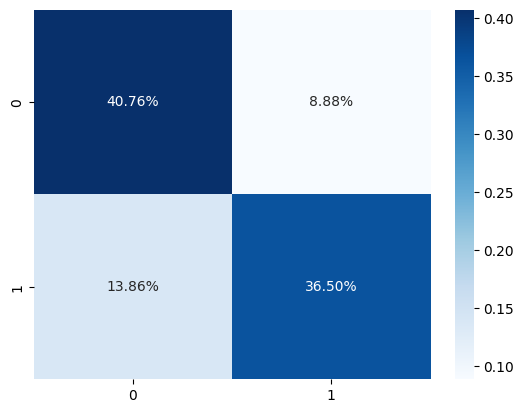

In [187]:
cf_matrix_lgbm = confusion_matrix(data_y_train_values, y_lgbm_predict)
sns.heatmap(cf_matrix_lgbm/np.sum(cf_matrix_lgbm), annot=True, 
            fmt='.2%', cmap='Blues');

#### Logistic Regression

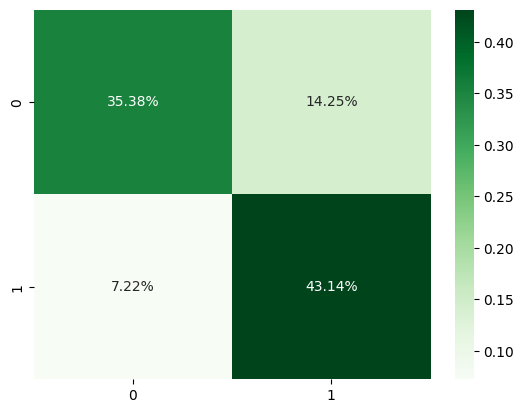

In [188]:
cf_matrix_lr = confusion_matrix(data_y_train_values, y_lr_predict)
sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, 
            fmt='.2%', cmap='Greens');

## Classificação baseado na combinação de outros classificadores

Como podemos ver, a chance de acerto para o *True* é maior para o modelo `Regressão Logística` e a chance de acerto para *False* é maior para o modelo do `LGBM`. Levando isso em consideração, e outros dois classificadores que desempenharam bem nos testes, vamos construir uma nova tabela que seja construída na probabilidade de um classificador escolher *True* ou *False* para o nosso **target**. Vamos usar o método do *cross validation predict* chamado de `predict_proba`, ou seja, a chance de estes parametros serem classificados como 1 ou 0 para cada um dos classificadores. Os quatro classificadores usados serão:

- `Regressão Logística`
- `LGBM`
- `XGBoost`
- `Gradient Boosting`

Depois desta tabela preparada, será passada por um quinto classificador, `Random Forest`, que usará a probabilidade de cada um dos outros classificadores como *features*.

Para começar, iremos construir o **Grid Search** para os modelos faltantes:

- **XGBoost**

In [189]:
XGBoost = xgb.XGBClassifier(random_state=RAND_SEED)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_xgboost = GridSearchCV(XGBoost, params, cv=N_SPLITS, n_jobs=-1)

grid_xgboost.fit(data_encoded_clean, data_y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [190]:
for key in grid_xgboost.best_params_.keys():
    print(f"{key}: {grid_xgboost.best_params_[key]}")

colsample_bytree: 0.8
gamma: 5
max_depth: 5
min_child_weight: 10
subsample: 0.6


- **Gradient Boosting**

In [191]:
GB = GradientBoostingClassifier(random_state=RAND_SEED)

params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": [0.1, 0.3, 0.5],
    "min_samples_leaf": [0.1, 0.3, 0.5],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse", "squared_error"],
    "subsample":[0.5, 0.8, 1.0]
    }

grid_GB = GridSearchCV(GB, params, cv=N_SPLITS, n_jobs=-1)

grid_GB.fit(data_encoded_clean, data_y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.3, 0.5],
                         'min_samples_split': [0.1, 0.3, 0.5],
                         'subsample': [0.5, 0.8, 1.0]})

In [192]:
for key in grid_GB.best_params_.keys():
    print(f"{key}: {grid_GB.best_params_[key]}")

criterion: friedman_mse
learning_rate: 0.2
max_depth: 5
max_features: sqrt
min_samples_leaf: 0.1
min_samples_split: 0.3
subsample: 1.0


Com todos os ajustes de hiperparâmetros feitos, podemos, então, construir toda a nossa nova base de dados com as probabilidades de cada classificador.

In [193]:
def predict_proba_classifier(classifier, X, y):
    y_predict_proba = cross_val_predict(
        classifier,
        X,
        y,
        cv=3,
        method="predict_proba",
        n_jobs=-1,
    )
    return y_predict_proba

In [194]:
y_predict_proba_lgbm = predict_proba_classifier(grid_lgbm_v2, data_encoded_clean, data_y_train)
y_predict_proba_RL = predict_proba_classifier(grid_lr, data_encoded_clean, data_y_train)
y_predict_proba_xgboost = predict_proba_classifier(grid_xgboost, data_encoded_clean, data_y_train)
y_predict_proba_GB = predict_proba_classifier(grid_GB, data_encoded_clean, data_y_train)

In [195]:
predict_proba_dict = {
    "lgbm_prob_0" : [],
    "lgbm_prob_1" : [],
    "RL_prob_0" : [],
    "RL_prob_1" : [],
    "xgboost_prob_0" : [],
    "xgboost_prob_1" : [],
    "GB_prob_0" : [],
    "GB_prob_1" : [],
}

for value in y_predict_proba_lgbm:
    predict_proba_dict["lgbm_prob_0"].append(value[0])
    predict_proba_dict["lgbm_prob_1"].append(value[1])
    
for value in y_predict_proba_RL:
    predict_proba_dict["RL_prob_0"].append(value[0])
    predict_proba_dict["RL_prob_1"].append(value[1])
    
for value in y_predict_proba_xgboost:
    predict_proba_dict["xgboost_prob_0"].append(value[0])
    predict_proba_dict["xgboost_prob_1"].append(value[1])
    
for value in y_predict_proba_GB:
    predict_proba_dict["GB_prob_0"].append(value[0])
    predict_proba_dict["GB_prob_1"].append(value[1])

In [196]:
df_predict_proba = pd.DataFrame(predict_proba_dict)
df_predict_proba

,lgbm_prob_0,lgbm_prob_1,RL_prob_0,RL_prob_1,xgboost_prob_0,xgboost_prob_1,GB_prob_0,GB_prob_1
0,0.509562,0.490438,0.373736,0.626264,0.351723,0.648277,0.331072,0.668928
1,0.547052,0.452948,0.717804,0.282196,0.928418,0.071582,0.869244,0.130756
2,0.528699,0.471301,0.999879,0.000121,0.971941,0.028059,0.532321,0.467679
3,0.540545,0.459455,0.987194,0.012806,0.981085,0.018915,0.637793,0.362207
4,0.547430,0.452570,0.750586,0.249414,0.907157,0.092842,0.862226,0.137774
...,...,...,...,...,...,...,...,...
8688,0.504768,0.495232,0.099854,0.900146,0.282918,0.717082,0.603927,0.396073
8689,0.469668,0.530332,0.180610,0.819390,0.133743,0.866257,0.168219,0.831781
8690,0.469561,0.530439,0.183233,0.816767,0.126318,0.873682,0.269644,0.730356
8691,0.528642,0.471358,0.968911,0.031089,0.934897,0.065103,0.520148,0.479852


Com o resultado dos classificadores em mãos, vamos ajustar os hiperparâmetros com o **Grid Search** para o nosso classificador final, que fará a combinação desses resultados. O classificador escolhido será o `Random Forest`, tanto por ser conhecido como um excelente classificador para estes tipos de variáveis e, também, por ser o quinto classificador que melhor desempenhou em nossos testes.

In [197]:
RFC = RandomForestClassifier(random_state=RAND_SEED)

params = { 
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth' : [5,10,50],
        'criterion' :['gini', 'entropy'],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [2, 3, 5],
        }

grid_RFC = GridSearchCV(RFC, params, cv=N_SPLITS, n_jobs=-1)

grid_RFC.fit(df_predict_proba, data_y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200]})

In [198]:
for key in grid_RFC.best_params_.keys():
    print(f"{key}: {grid_RFC.best_params_[key]}")

criterion: entropy
max_depth: 5
max_features: sqrt
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 100


# Curva ROC da Combinação

Com o nosso modelo final criado e ajustado, vamos *plotar* a curva ROC para visualizar a diferença em relação aos outros dois modelos escolhidos:

In [199]:
y_scores_comb = cross_val_predict(
    grid_RFC,
    df_predict_proba,
    data_y_train,
    cv=3,
    method="predict_proba",
    n_jobs=-1,
)

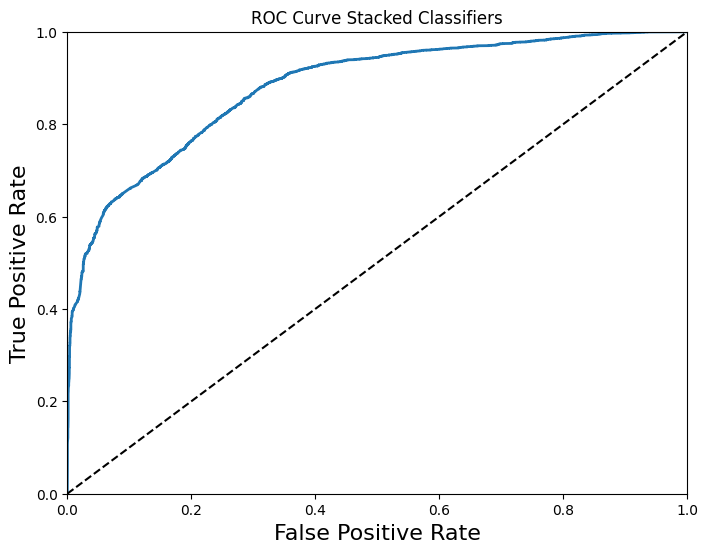

In [200]:
false_positive_rate_comb, true_positive_rate_comb, threshold_comb = roc_curve(data_y_train_values, y_scores_comb[:,1])

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_comb, true_positive_rate_comb, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title("ROC Curve Stacked Classifiers")
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

# Heat Map da Combinação

Além da representação pela **Curva ROC**, também vamos mostrar os resultados pelo `Heat Map`

In [201]:
y_comb_predict = cross_val_predict(
    grid_RFC,
    df_predict_proba,
    data_y_train_values,
    cv=3,
    n_jobs=-1
)

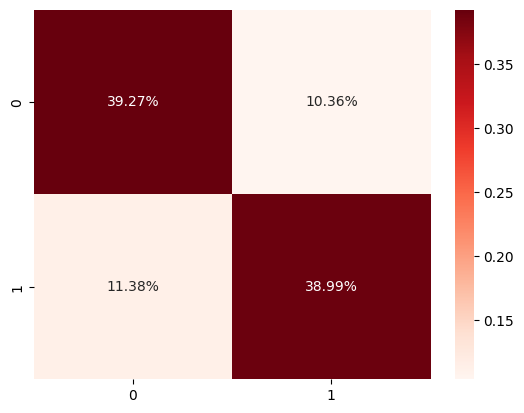

In [202]:
cf_matrix_comb = confusion_matrix(data_y_train_values, y_comb_predict)
sns.heatmap(cf_matrix_comb/np.sum(cf_matrix_comb), annot=True, 
            fmt='.2%', cmap='Reds');

-----------

# Aplicando para o TESTE

In [203]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [204]:
teste[['deck','num','side']] = teste['Cabin'].str.split('/', expand = True)

In [205]:
teste.loc[teste["CryoSleep"] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0 

In [206]:
teste_for_input = teste.drop(["PassengerId", "Name", "Cabin", "deck", "side", "HomePlanet",'Destination'], axis=1)

In [207]:
teste_tratado = imputer.fit_transform(teste_for_input)

In [208]:
teste_tratado = pd.DataFrame(teste_tratado, columns=teste_for_input.columns)
teste_tratado.loc[(teste_tratado["VIP"] == 0.2) | (teste_tratado["VIP"] == 0.4), ["VIP"]] = 0
teste_tratado.loc[(teste_tratado["CryoSleep"] == 0.2) | (teste_tratado["CryoSleep"] == 0.4) | (teste_tratado["CryoSleep"] == 0.6) | (teste_tratado["CryoSleep"] == 0.8), ["CryoSleep"]] = 0
teste_tratado

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,4.0
2,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,1.0
4,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
4272,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1496.0
4273,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,936.6
4274,1.0,20.6,0.0,0.0,0.0,0.0,0.0,0.0,296.0
4275,0.0,35.4,0.0,0.0,2680.0,0.0,0.0,523.0,297.0


In [209]:
# Aplicando novamente para corrigir imperfeições e incongruências após o imputer
teste_tratado.loc[teste["CryoSleep"] == 0.0, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0 

In [210]:
temp_teste = teste.drop(["PassengerId"], axis=1)
teste_important = temp_teste.loc[:, ["Name", "Cabin", "deck", "side", "HomePlanet",'Destination']]
teste_tratado_concat = pd.concat([teste_tratado, teste_important], axis=1)
teste_tratado_concat

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,Name,Cabin,deck,side,HomePlanet,Destination
0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Nelly Carsoning,G/3/S,G,S,Earth,TRAPPIST-1e
1,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Lerome Peckers,F/4/S,F,S,Earth,TRAPPIST-1e
2,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C/0/S,C,S,Europa,55 Cancri e
3,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Meratz Caltilter,C/1/S,C,S,Europa,TRAPPIST-1e
4,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Brence Harperez,F/5/S,F,S,Earth,TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1496.0,Jeron Peter,G/1496/S,G,S,Earth,TRAPPIST-1e
4273,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,936.6,Matty Scheron,NaN,NaN,NaN,Earth,TRAPPIST-1e
4274,1.0,20.6,0.0,0.0,0.0,0.0,0.0,0.0,296.0,Jayrin Pore,D/296/P,D,P,Mars,55 Cancri e
4275,0.0,35.4,0.0,0.0,0.0,0.0,0.0,0.0,297.0,Kitakan Conale,D/297/P,D,P,Europa,NaN


In [219]:
teste_cat = teste_tratado_concat.loc[:, ["HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side"]]
teste_cat = teste_cat.fillna("NaN")

meu_one_hot_encoder.fit_transform(teste_cat)


# concat data_cat with data
teste_encoded = pd.concat([teste_tratado_concat, pd.DataFrame(meu_one_hot_encoder.fit_transform(teste_cat), columns=meu_one_hot_encoder.get_feature_names_out())], axis=1)
teste_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   float64
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   float64
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   num                        4277 non-null   float64
 9   Name                       4183 non-null   object 
 10  Cabin                      4177 non-null   object 
 11  deck                       4177 non-null   object 
 12  side                       4177 non-null   object 
 13  HomePlanet                 4190 non-null   objec

In [220]:
teste_encoded_clean = teste_encoded.drop(["Name", "Age", "HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side", "Cabin"], axis=1)

In [221]:
teste_encoded_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RoomService                4277 non-null   float64
 1   FoodCourt                  4277 non-null   float64
 2   ShoppingMall               4277 non-null   float64
 3   Spa                        4277 non-null   float64
 4   VRDeck                     4277 non-null   float64
 5   num                        4277 non-null   float64
 6   HomePlanet_Earth           4277 non-null   float64
 7   HomePlanet_Europa          4277 non-null   float64
 8   HomePlanet_Mars            4277 non-null   float64
 9   HomePlanet_NaN             4277 non-null   float64
 10  CryoSleep_0.0              4277 non-null   float64
 11  CryoSleep_1.0              4277 non-null   float64
 12  Destination_55 Cancri e    4277 non-null   float64
 13  Destination_NaN            4277 non-null   float

In [222]:
def predict_proba_classifier_teste(classifier, X):
    y_predict_proba = classifier.predict_proba(X)
    return y_predict_proba

In [223]:
y_predict_proba_lgbm_teste = predict_proba_classifier_teste(grid_lgbm_v2, teste_encoded_clean)
y_predict_proba_RL_teste = predict_proba_classifier_teste(grid_lr, teste_encoded_clean)
y_predict_proba_xgboost_teste = predict_proba_classifier_teste(grid_xgboost, teste_encoded_clean)
y_predict_proba_GB_teste = predict_proba_classifier_teste(grid_GB, teste_encoded_clean)

In [224]:
predict_proba_dict_teste = {
    "lgbm_prob_0" : [],
    "lgbm_prob_1" : [],
    "RL_prob_0" : [],
    "RL_prob_1" : [],
    "xgboost_prob_0" : [],
    "xgboost_prob_1" : [],
    "GB_prob_0" : [],
    "GB_prob_1" : [],
}

for value in y_predict_proba_lgbm_teste:
    predict_proba_dict_teste["lgbm_prob_0"].append(value[0])
    predict_proba_dict_teste["lgbm_prob_1"].append(value[1])
    
for value in y_predict_proba_RL_teste:
    predict_proba_dict_teste["RL_prob_0"].append(value[0])
    predict_proba_dict_teste["RL_prob_1"].append(value[1])
    
for value in y_predict_proba_xgboost_teste:
    predict_proba_dict_teste["xgboost_prob_0"].append(value[0])
    predict_proba_dict_teste["xgboost_prob_1"].append(value[1])
    
for value in y_predict_proba_GB_teste:
    predict_proba_dict_teste["GB_prob_0"].append(value[0])
    predict_proba_dict_teste["GB_prob_1"].append(value[1])

In [225]:
df_teste_predict_proba = pd.DataFrame(predict_proba_dict_teste)
df_teste_predict_proba

,lgbm_prob_0,lgbm_prob_1,RL_prob_0,RL_prob_1,xgboost_prob_0,xgboost_prob_1,GB_prob_0,GB_prob_1
0,0.478053,0.521947,0.284851,0.715149,0.469972,0.530028,0.436831,0.563169
1,0.494004,0.505996,0.533898,0.466102,0.389755,0.610245,0.417621,0.582379
2,0.396869,0.603131,0.092294,0.907706,0.007212,0.992788,0.013962,0.986038
3,0.475243,0.524757,0.233691,0.766309,0.050925,0.949075,0.184002,0.815998
4,0.494004,0.505996,0.533860,0.466140,0.389755,0.610245,0.417621,0.582379
...,...,...,...,...,...,...,...,...
4272,0.450708,0.549292,0.240663,0.759337,0.392518,0.607482,0.268147,0.731853
4273,0.492801,0.507199,0.571610,0.428390,0.441700,0.558300,0.262607,0.737393
4274,0.414192,0.585808,0.241620,0.758380,0.041844,0.958156,0.067367,0.932633
4275,0.487876,0.512124,0.281400,0.718600,0.143519,0.856481,0.167939,0.832061


In [226]:
y_predict = grid_RFC.predict(df_teste_predict_proba)
y_predict

array([ True, False,  True, ...,  True,  True,  True])

In [227]:
sample_submission = pd.concat([teste.loc[: , "PassengerId"], pd.DataFrame(y_predict, columns=["Transported"])], axis=1)
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [229]:
sample_submission.to_csv('sample_submission.csv',index=False)

--------------

## Resultados

Com o `sample_submission.csv`, enviamos para o **kaggle** e nosso *score* para o envio foi de **0.62847**, na posição 2426.

Averiguando o resultado e explorando possível melhorias, acreditamos que talvez tenha ocorrido um *overfitting* dos nossos modelos, uma vez que realizamos tantas mudanças para preencher do modo mais correto possível que pode ter alterado demais os resultados. Para melhorar, provavelmente teríamos sido mais simples no preenchimento dos dados, o que poderia melhorar o *fit* e nos garantir maior acurácia no teste.